# Part II - User trends for Ford GoBike System
## by Bryan Willis


## Investigation Overview

The overall goal of this deck is to highlight the different user trends for the GoBike system. The number of subscribers dominated across different birth groups compared to customers. Those born in the 80s, and 90s had the highest count of both subscribers and customers. In terms of trip duration by gender, most trips were made within an hour. Male users had slightly longer trips with those identifying as other having the shortest. As for trip duration by birth group and user type, customers had longer trip durations regardless of birth group. Subscribers for all birth groups had trips mostly within the 10-15  minute range.

## Dataset Overview

The dataset used for this project is the Ford GoBike System Data, which is a dataset covering the individual rides made by the bike-sharing system which covers the Greater San Francisco area. This dataset covers all rides that start in February 2019 and contains both start/end time of the ride, name of the start/end station, location of the start/end station, the ID of the bike, and information about the user such as the gender and year of birth.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bikeshare_clean.csv')

## User Type by Birth Group

Below shows the count of bike share users group by their birth group. The birth group is defined as the decade the user is born in. We can see that in all birth groups, the number of users that are subscribers are much higher than customers. Those born in the 80s and 90s have the highest counts of subscribers.


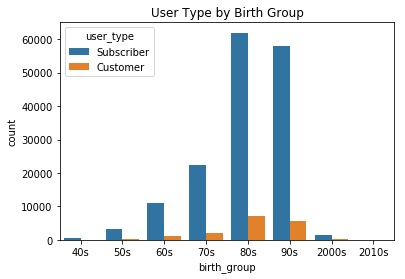

In [10]:
sb.countplot(data = df, x = 'birth_group', hue = 'user_type', order = ['40s', '50s','60s','70s','80s','90s','2000s','2010s']).set(title='User Type by Birth Group');

## Trip Duration by Gender
This shows the trip duration for all users and is grouped by the user gender. We can see that most trips fall within an hour indicated by the spike. Male users tend to have lsighly longer trips as shown by the delayed spike compared to female and those identified as other.


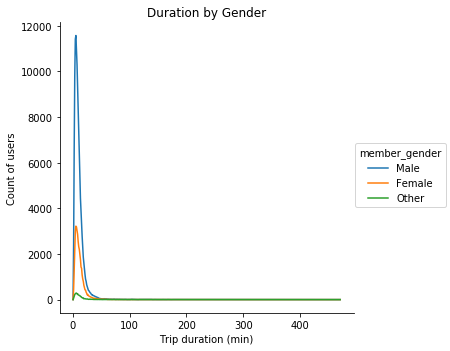

In [9]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(0, df['duration_min'].max(), 1)
g = sb.FacetGrid(data = df, hue = 'member_gender', size = 5).set(title='Duration by Gender');
g.map(freq_poly, "duration_min", bins = bin_edges);
g.add_legend();
g.axes[0,0].set_ylabel('Count of users');
g.axes[0,0].set_xlabel('Trip duration (min)');

## Trip duration by birth group and user type
This graph shows the trip duration in minutes for each birth group grouped by the user type. We see that for all birth groups, customers tended to have longer trips while subscribers tended to have trips falling within 10-15 minutes for all birth groups. 



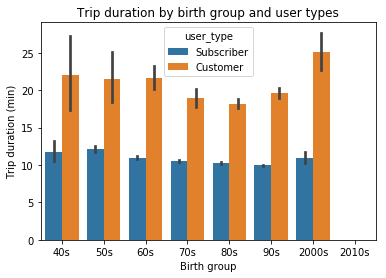

In [7]:
sb.barplot(data = df, x = 'birth_group', y = 'duration_min', hue = 'user_type', order = ['40s', '50s','60s','70s','80s','90s','2000s','2010s']).set(title='Trip duration by birth group and user types', xlabel='Birth group', ylabel='Trip duration (min)');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
